In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def autocorrelation_function(time,scale,autocorrelation_time):
    return scale*np.exp(-time/autocorrelation_time)

def generate_correlated_data(autocorrelation_time, number_of_measurements):
    τ = autocorrelation_time
    N = number_of_measurements
    _data = np.random.rand(N)
    data = np.zeros(N)
    for i in range(N):
        data[i] = (_data[:i]*autocorrelation_function(np.arange(i),1.0,autocorrelation_time)[::-1]).sum()
    return data

"""def generate_correlated_data(autocorrelation_time, number_of_uncorrelated_measurements, scale_randn=0.0):
    τ = autocorrelation_time
    _N = number_of_uncorrelated_measurements
    ΔMC_data = 1.0/(τ - 1)
    N = _N*τ
    _data = np.random.rand(_N)
    data = np.zeros(N)
    for i in range(_N):
        if np.random.rand() < 0.5:
            for j in range(τ):
                data[i*τ + j] = _data[i] - 0.5 + ΔMC_data*j*(np.random.randn()*scale_randn + 1.0)
        else:
            for j in range(τ):
                data[i*τ + j] = _data[i] + 0.5 - ΔMC_data*j*(np.random.randn()*scale_randn + 1.0)
    return data"""

'def generate_correlated_data(autocorrelation_time, number_of_uncorrelated_measurements, scale_randn=0.0):\n    τ = autocorrelation_time\n    _N = number_of_uncorrelated_measurements\n    ΔMC_data = 1.0/(τ - 1)\n    N = _N*τ\n    _data = np.random.rand(_N)\n    data = np.zeros(N)\n    for i in range(_N):\n        if np.random.rand() < 0.5:\n            for j in range(τ):\n                data[i*τ + j] = _data[i] - 0.5 + ΔMC_data*j*(np.random.randn()*scale_randn + 1.0)\n        else:\n            for j in range(τ):\n                data[i*τ + j] = _data[i] + 0.5 - ΔMC_data*j*(np.random.randn()*scale_randn + 1.0)\n    return data'

In [17]:
autocorrelation_time = 30
number_of_uncorrelated_measurements = 10000
data_correlated = generate_correlated_data(autocorrelation_time, number_of_uncorrelated_measurements)
MC_steps = np.arange(data_correlated.shape[0])
print(MC_steps)

[   0    1    2 ... 9997 9998 9999]


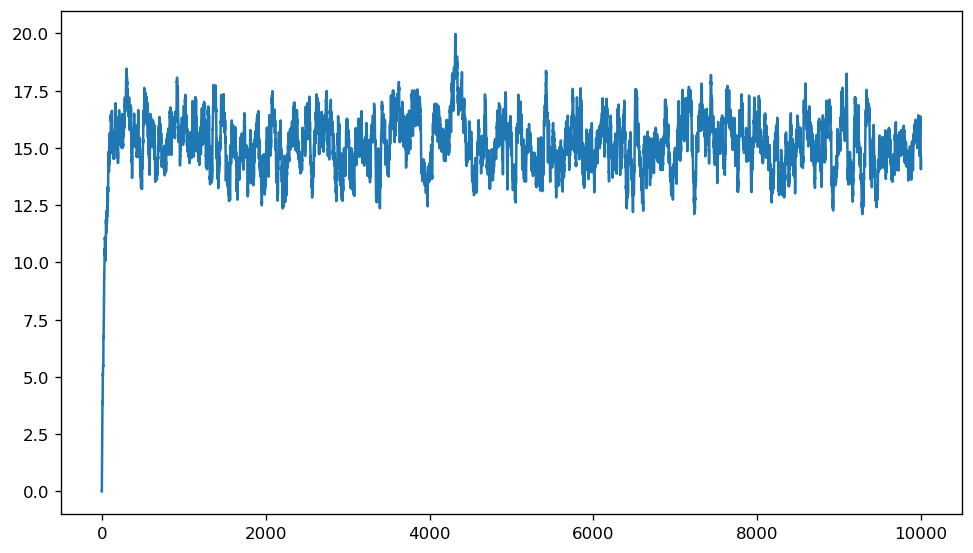

In [4]:
fig, ax = plt.subplots(figsize=(8,4.5), dpi=120, constrained_layout=True)
ax.plot(MC_steps,data_correlated)

(0.0, 100.0)

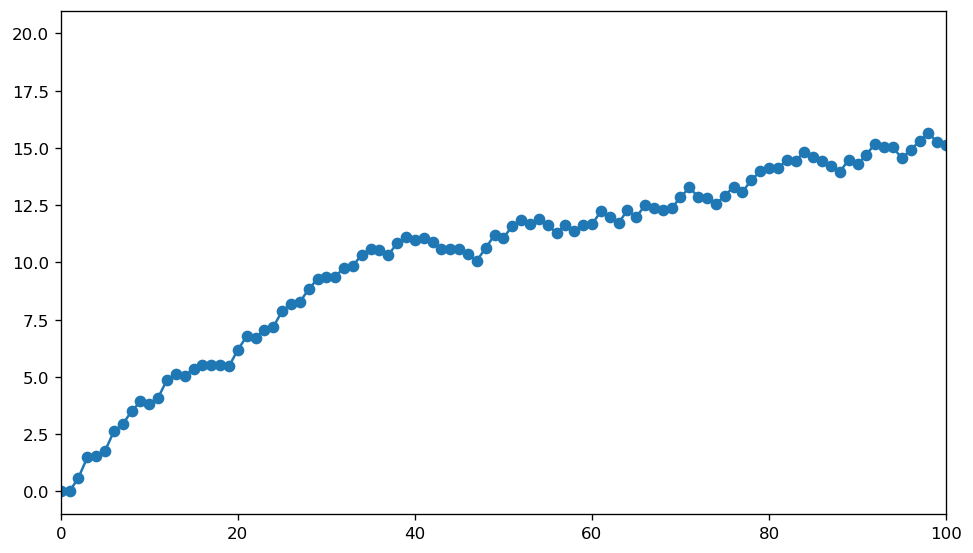

In [5]:
fig, ax = plt.subplots(figsize=(8,4.5), dpi=120, constrained_layout=True)
ax.plot(MC_steps,data_correlated,marker="o")
ax.set_xlim(0,100)

In [6]:
def autocorrelation(data):
    N = data.shape[0]
    _autocorrelation = np.zeros(N)
    for Δt in range(N-1):
        denom = np.mean(data[:N - Δt]**2) - np.mean(data[:N - Δt])**2 #Variance at t0
        num = np.mean(data[:N - Δt]*data[Δt:]) - np.mean(data[:N - Δt])*np.mean(data[Δt:])
        _autocorrelation[Δt] = num/denom
    return _autocorrelation

In [23]:
_autocorrelation = autocorrelation(data_correlated)
time_separation = np.arange(_autocorrelation.shape[0])
print(time_separation)

[   0    1    2 ... 9997 9998 9999]


In [22]:
from scipy.optimize import curve_fit

In [9]:
def autocorrelation_function(time,scale,autocorrelation_time):
    return scale*np.exp(-time/autocorrelation_time)

In [25]:
popt, perr = curve_fit(autocorrelation_function, time_separation, _autocorrelation)
print("popt = ", popt)
print("perr = ", perr)

popt =  [ 1.00500961 30.00405442]
perr =  [[ 5.93960746e-04 -1.77247514e-02]
 [-1.77247514e-02  1.09433141e+00]]


In [11]:
def integrated_autocorrelation_time(data):
    data_mean_squared = np.mean(data)**2
    variance = np.mean(data**2) - data_mean_squared
    τ_int_auto = 0.0
    N = data.shape[0]
    for Δt in range(N):
        τ_int_auto += np.mean(data[:N - Δt]*data[Δt:]) - data_mean_squared
    return τ_int_auto/variance

In [12]:
autocorrelation_time_int = integrated_autocorrelation_time(data_correlated)

(0.0, 100.0)

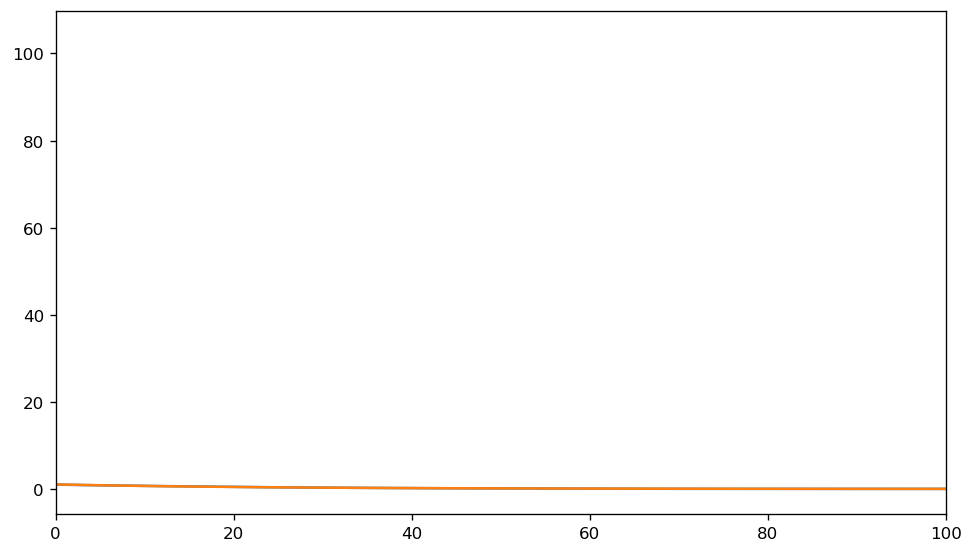

In [13]:
fig,ax = plt.subplots(figsize=(8,4.5), dpi=120, constrained_layout=True)
ax.plot(time_separation, _autocorrelation)
ax.plot(time_separation, autocorrelation_function(time_separation,*popt))
#ax.plot(time_separation, autocorrelation_function(time_separation, 1.0, autocorrelation_time_int))
ax.set_xlim((0,100))

In [14]:
print("τ_auto: {}".format(popt[1]))
print("4τ_auto: {}".format(4*popt[1]))
print("τ_auto_int: {}".format(autocorrelation_time_int))
print("τ_exact: {}".format(autocorrelation_time))

τ_auto: 24.236204365917807
4τ_auto: 96.94481746367123
τ_auto_int: -19357.523594548657
τ_exact: 30
